In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
data = pd.read_csv('/kaggle/input/zindi-geoai-ground-level-no2-estimation-challenge/Train.csv')
data_test = pd.read_csv('/kaggle/input/zindi-geoai-ground-level-no2-estimation-challenge/Test.csv')

In [4]:
data.head(2)

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            86584 non-null  object 
 1   Date                86584 non-null  object 
 2   ID                  86584 non-null  object 
 3   LAT                 86584 non-null  float64
 4   LON                 86584 non-null  float64
 5   Precipitation       86584 non-null  float64
 6   LST                 46798 non-null  float64
 7   AAI                 73709 non-null  float64
 8   CloudFraction       73709 non-null  float64
 9   NO2_strat           73709 non-null  float64
 10  NO2_total           73709 non-null  float64
 11  NO2_trop            51111 non-null  float64
 12  TropopausePressure  73709 non-null  float64
 13  GT_NO2              82051 non-null  float64
dtypes: float64(11), object(3)
memory usage: 9.2+ MB


In [ ]:
data_test.isna().sum()

In [ ]:
data.hist(bins=20, figsize=(15,10))

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

/tmp/ipykernel_33/1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Text(0.5, 1.0, 'GT_NO2 Time Series')

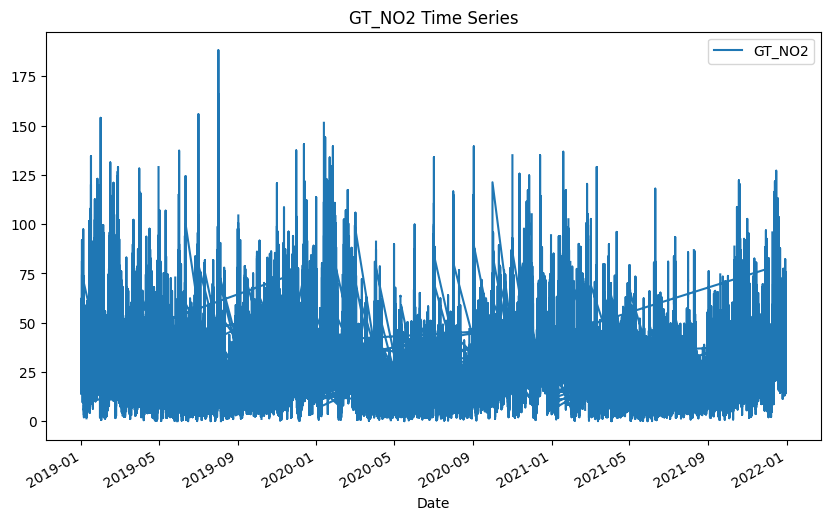

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
data.plot('Date','GT_NO2', ax=ax)
ax.set_title("GT_NO2 Time Series")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='GT_NO2'>

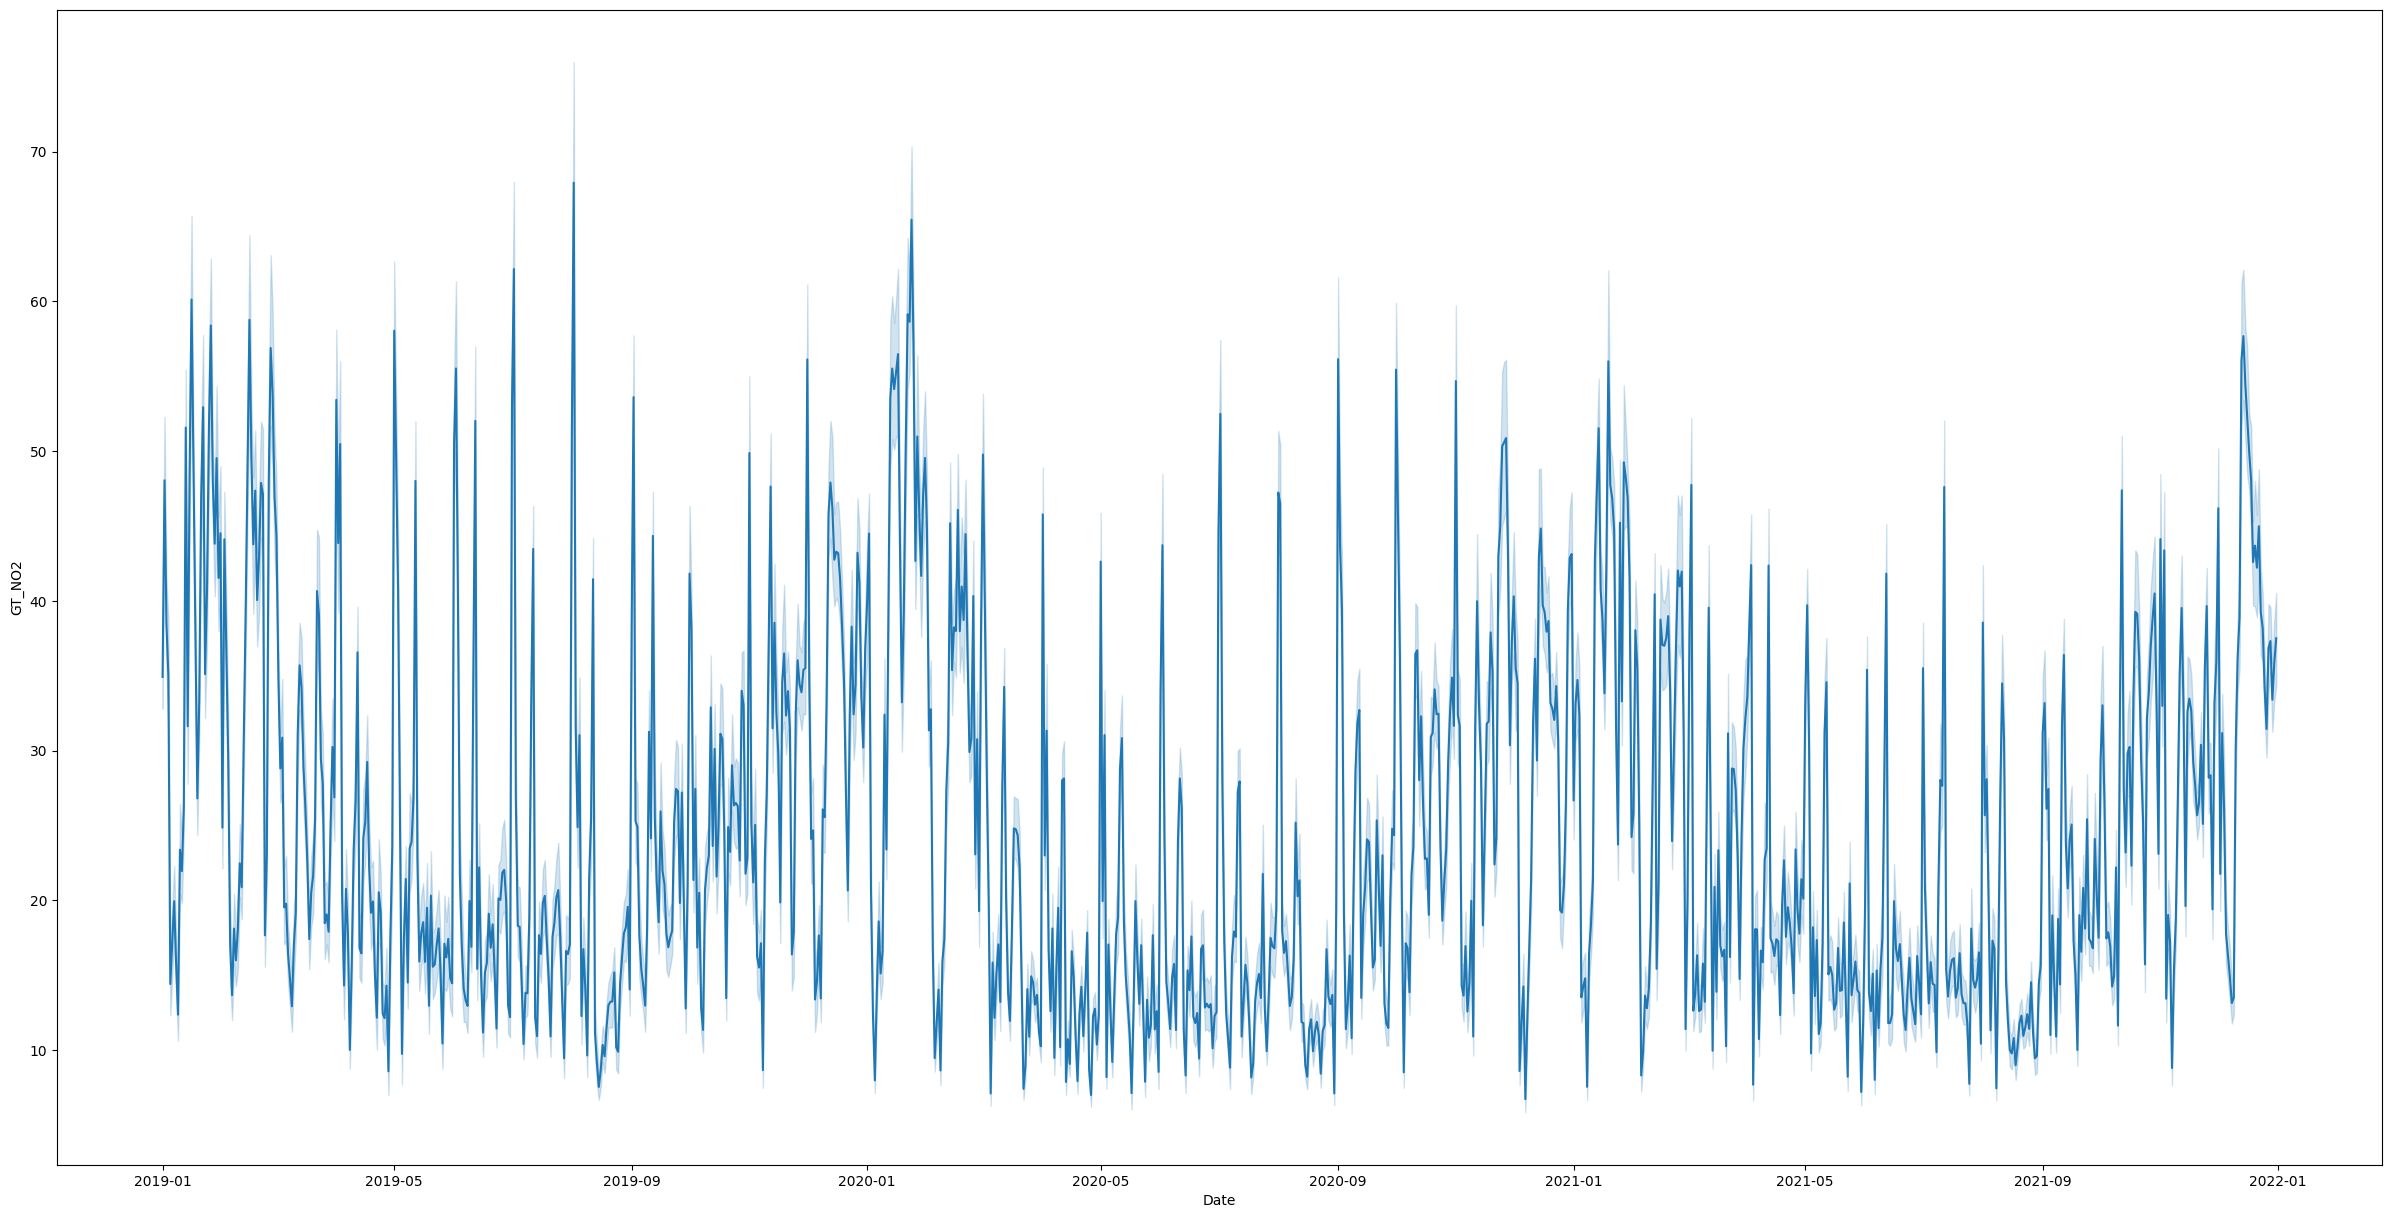

In [9]:
fig, ax = plt.subplots(figsize=(30,15))
sns.lineplot(x='Date',y='GT_NO2', data=data, ax=ax)

In [10]:
data.isna().sum()

ID_Zindi                  0
Date                      0
ID                        0
LAT                       0
LON                       0
Precipitation             0
LST                   39786
AAI                   12875
CloudFraction         12875
NO2_strat             12875
NO2_total             12875
NO2_trop              35473
TropopausePressure    12875
GT_NO2                 4533
dtype: int64

In [11]:
data_inter = data.interpolate('linear')

/tmp/ipykernel_33/3312143958.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_inter = data.interpolate('linear')


In [12]:
data_inter.isna().sum()

ID_Zindi               0
Date                   0
ID                     0
LAT                    0
LON                    0
Precipitation          0
LST                    5
AAI                    0
CloudFraction          0
NO2_strat              0
NO2_total              0
NO2_trop              11
TropopausePressure     0
GT_NO2                 0
dtype: int64

In [13]:
data_inter = data_inter.drop(['ID_Zindi','ID'],axis=1)

In [15]:
# Set the datetime column as the index
data_inter.set_index('Date', inplace=True)

In [16]:
def moving_avarage_smoothing(X,k):
	S = np.zeros(X.shape[0])
	for t in range(X.shape[0]):
		if t < k:
			S[t] = np.mean(X[:t+1])
		else:
			S[t] = np.sum(X[t-k:t])/k
	return S

In [26]:
time_series = np.array(data_inter['GT_NO2'])
m_a_s = moving_avarage_smoothing(time_series,1000)

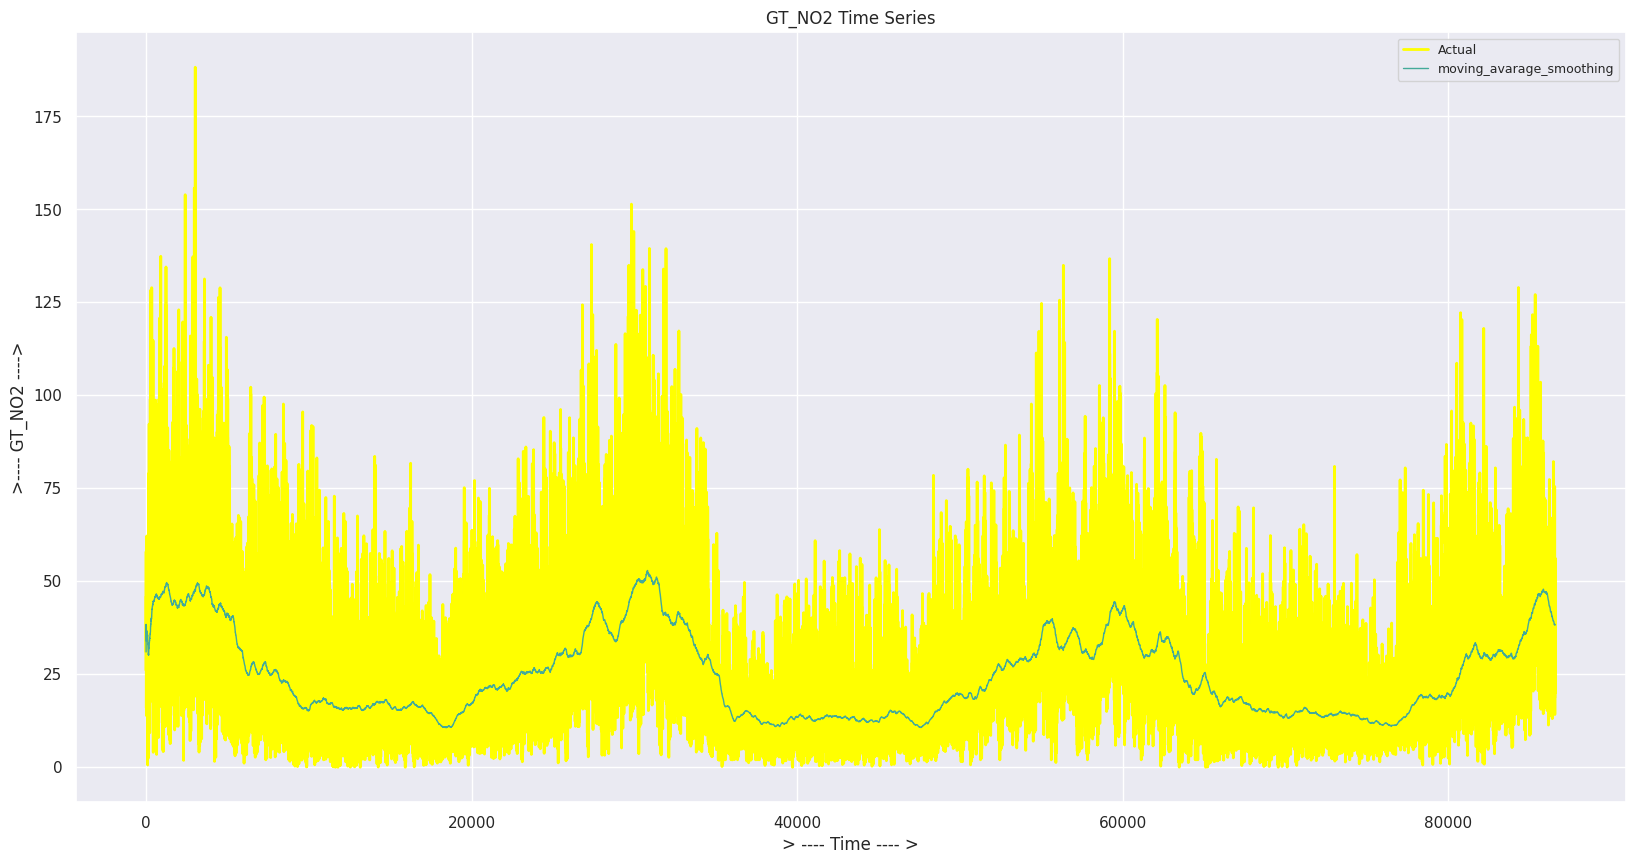

In [38]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax = plt.gca()

plt.title('GT_NO2 Time Series')
plt.xlabel("> ---- Time ---- >")
plt.ylabel(">---- GT_NO2 ---->")

plt.plot(time_series,linewidth = 2,label="Actual",color='yellow')
plt.plot(m_a_s,linewidth=1,label="moving_avarage_smoothing",color="#44AA99")
plt.legend(fontsize=9)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

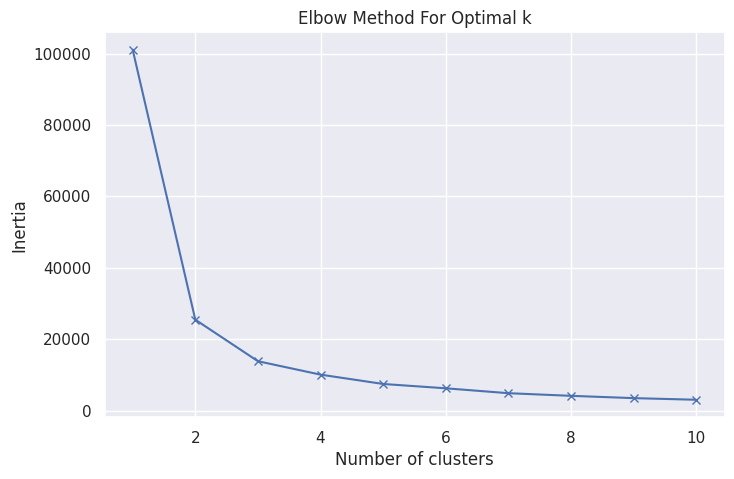

In [40]:
from sklearn.cluster import KMeans
cluster_df = data_inter[['LON','LAT']]
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


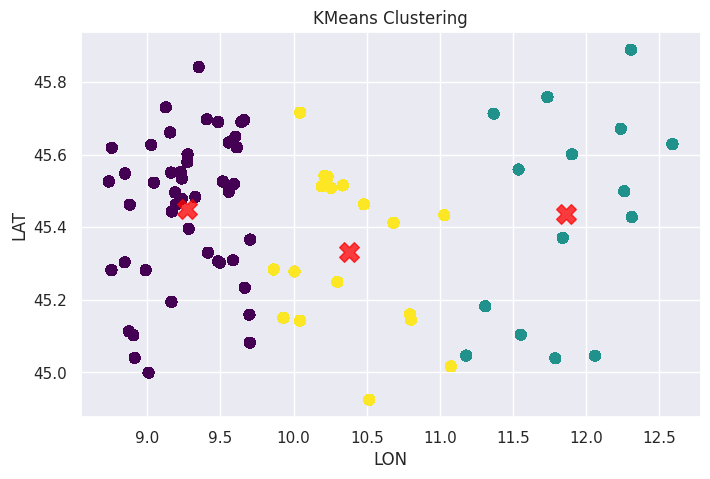

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(cluster_df)

# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(cluster_df['LON'], cluster_df['LAT'], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('LON')
plt.ylabel('LAT')
plt.title('KMeans Clustering')
plt.show()

In [46]:
data_inter['cluster'] = y_kmeans
data_inter['smooth_NO2'] = m_a_s
data_inter.head(2)

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,cluster,smooth_NO2
Date,,,,,,,,,,,,,
2019-01-01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0,1,31.0
2019-01-01,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0,1,36.5


In [47]:
data_inter.isna().sum()

LAT                    0
LON                    0
Precipitation          0
LST                    5
AAI                    0
CloudFraction          0
NO2_strat              0
NO2_total              0
NO2_trop              11
TropopausePressure     0
GT_NO2                 0
cluster                0
smooth_NO2             0
dtype: int64

In [51]:
data_inter = data_inter.dropna()
#data_inter = data_inter.drop(['GT_NO2'],axis=1)
x = data_inter.drop('smooth_NO2',axis=1)
y = data_inter['smooth_NO2']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=20 ,random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_scaled_train, y_train)

LinearRegression()

In [56]:
from sklearn.metrics import r2_score
ypred = lr.predict(x_scaled_test)
acc = r2_score(y_test,ypred)

In [57]:
acc

0.7124388293016186